### Genel Bakış

Bu çalışmanın amacı nöbetleri ve diğer zararlı beyin aktivitelerini tespit etmek ve sınıflandırmaktır. Hastanedeki kritik hastalardan kaydedilen elektroensefalografi (EEG) sinyalleri üzerine eğitilmiş bir model geliştirilecektir.

Çalışma, elektroensefalografi modeli sınıflandırma doğruluğunun hızla iyileştirilmesine yardımcı olabilir ve nörokritik bakım, epilepsi ve ilaç geliştirme için dönüştürücü faydaların kilidini açabilir. Bu alandaki ilerleme, doktorların ve beyin araştırmacılarının nöbetleri veya diğer beyin hasarlarını tespit ederek daha hızlı ve daha doğru tedaviler sunmasına olanak tanıyabilir.

In [29]:
# importing the data
import pandas as pd
df = pd.read_csv("train.csv")
df

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
0,1628180742,0,0.0,353733,0,0.0,127492639,42516,Seizure,3,0,0,0,0,0
1,1628180742,1,6.0,353733,1,6.0,3887563113,42516,Seizure,3,0,0,0,0,0
2,1628180742,2,8.0,353733,2,8.0,1142670488,42516,Seizure,3,0,0,0,0,0
3,1628180742,3,18.0,353733,3,18.0,2718991173,42516,Seizure,3,0,0,0,0,0
4,1628180742,4,24.0,353733,4,24.0,3080632009,42516,Seizure,3,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106795,351917269,6,12.0,2147388374,6,12.0,4195677307,10351,LRDA,0,0,0,3,0,0
106796,351917269,7,14.0,2147388374,7,14.0,290896675,10351,LRDA,0,0,0,3,0,0
106797,351917269,8,16.0,2147388374,8,16.0,461435451,10351,LRDA,0,0,0,3,0,0
106798,351917269,9,18.0,2147388374,9,18.0,3786213131,10351,LRDA,0,0,0,3,0,0


In [30]:
# Hedef değişkenlerin seçilmesi
df1 = df[["seizure_vote", "lpd_vote","gpd_vote",  "lrda_vote", "grda_vote", "other_vote", "expert_consensus"]]
df1.head()

,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote,expert_consensus
0,3,0,0,0,0,0,Seizure
1,3,0,0,0,0,0,Seizure
2,3,0,0,0,0,0,Seizure
3,3,0,0,0,0,0,Seizure
4,3,0,0,0,0,0,Seizure


In [54]:
# Eşsiz veya benzersiz değerlere bakma
df.expert_consensus.unique()

array(['Seizure', 'GPD', 'LRDA', 'Other', 'GRDA', 'LPD'], dtype=object)

In [31]:
# Eksik değerleri kontrol etme
df1.isnull().sum()

seizure_vote        0
lpd_vote            0
gpd_vote            0
lrda_vote           0
grda_vote           0
other_vote          0
expert_consensus    0
dtype: int64

In [32]:
# "expert_consenus" sütunundaki kategorik değerleri sayısal değerlere dönüştürmek için LabelEncoder kullanma
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1["expert_consensus"] = le.fit_transform(df1["expert_consensus"])
df1.head()

C:\Users\mahsu\AppData\Local\Temp\ipykernel_23200\242246408.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["expert_consensus"] = le.fit_transform(df1["expert_consensus"])


,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote,expert_consensus
0,3,0,0,0,0,0,5
1,3,0,0,0,0,0,5
2,3,0,0,0,0,0,5
3,3,0,0,0,0,0,5
4,3,0,0,0,0,0,5


In [33]:
# Satır ve sütunları seçme
X = df1.iloc[:, :-1].values
y = df1.iloc[:, -1].values

In [34]:
# Veri kümesini eğitim ve test setlerine ayırmak için train_test_split fonksiyonunu kullanma

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [35]:
print(X_train)

[[ 3  0  0  0  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  2  0  1]
 ...
 [ 0  0  0  2  0  1]
 [ 1  0  2  0  0  0]
 [ 1  1 11  0  0  2]]


In [36]:
print(X_test)

[[4 1 1 0 0 8]
 [0 4 0 0 0 1]
 [3 0 0 0 0 0]
 ...
 [0 0 0 2 0 1]
 [0 0 0 0 0 5]
 [0 0 0 0 3 0]]


In [37]:
print(y_train)

[5 1 3 ... 3 0 0]


In [38]:
print(y_test)

[4 2 5 ... 3 4 1]


In [39]:
# RandomForestClassifier sınıfından bir model oluşturma ve bu modeli eğitim verisiyle uyumlu hale getirme
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=0)

rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [40]:
# RandomForestClassifier için en iyi hiperparametre kombinasyonunu bulmak için kapsamlı bir arama yapma
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd

# Parametre aralıklarını belirle
parametreler = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [2, 4],
    'max_features': ['auto', 'sqrt']
}

# GridSearchCV oluştur
grid_search = GridSearchCV(estimator=rf_model, param_grid=parametreler, cv=3, n_jobs=-1, verbose=2)

# GridSearchCV'yi veriye uygula
grid_search.fit(X, y)

# En iyi parametreleri ve en iyi skoru yazdır
print("En iyi parametreler:", grid_search.best_params_)
print("En iyi skor:", grid_search.best_score_)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


c:\Users\mahsu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
48 fits failed out of a total of 96.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\mahsu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\mahsu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\mahsu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py"

En iyi parametreler: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
En iyi skor: 0.9914981273408241


In [41]:
# GridSearchCV ile bulunan en iyi parametreleri kullanarak yeni bir RandomForestClassifier modeli oluşturma ve bu modeli tüm veri seti üzerinde eğitme
from sklearn.ensemble import RandomForestClassifier

# En iyi parametreleri kullanarak RandomForestClassifier oluştur
rf_model_best = RandomForestClassifier(max_depth=10,
                                       max_features='sqrt',
                                       min_samples_leaf=4,
                                       min_samples_split=2,
                                       n_estimators=100)

# Veri seti ile modeli eğit
rf_model_best.fit(X, y)

RandomForestClassifier(max_depth=10, min_samples_leaf=4)

In [42]:
# rf_model_best adlı en iyi parametrelerle eğitilmiş RandomForestClassifier modeli kullanılarak X_test veri seti üzerinde tahminler yapma

y_pred = rf_model_best.predict(X_test)

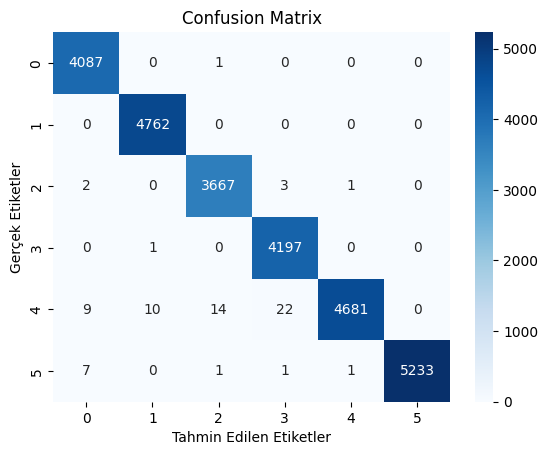

In [43]:
# Modelin tahminlerinin gerçek değerlerle karşılaştırılması için bir karmaşıklık matrisi oluşturma ve bunu bir ısı haritası olarak görselleştirme
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Heatmap'i çizme
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# Eksen etiketlerini ayarlama
plt.title("Confusion Matrix")
plt.xlabel("Tahmin Edilen Etiketler")
plt.ylabel("Gerçek Etiketler")

# Grafiği gösterme
plt.show()

In [44]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Doğruluk:", accuracy)

Doğruluk: 0.9972659176029962


In [45]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Kesinlik:", precision)
print("Hassasiyet:", recall)

Kesinlik: 0.9972762030325735
Hassasiyet: 0.9972659176029962


In [46]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Skoru:", f1)

F1 Skoru: 0.9972627696251634


In [47]:
import pandas as pd
unseen = pd.read_csv("sample_submission.csv")
unseen

,eeg_id,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
0,3911565283,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667


In [48]:
unseen1 = unseen.iloc[:, 1:]

In [49]:
y_pred = rf_model_best.predict(unseen1)

c:\Users\mahsu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [50]:
y_pred

array([3])

In [56]:
# Tahminleri orijinal kategorik değerlere dönüştürme

y_pred = le.inverse_transform(y_pred)

In [57]:
unseen["predict"] = y_pred
unseen.head()

,eeg_id,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote,predict
0,3911565283,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,LRDA


In [58]:
# Veri setini CSV dosyasına kaydetme
#unseen.to_csv('submission.csv', index=False)